In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-imc-day-5/trades_round_3_day_2_wn.csv
/kaggle/input/final-imc-day-5/trades_round_4_day_3_wn.csv
/kaggle/input/final-imc-day-5/prices_round_1_day_-2.csv
/kaggle/input/final-imc-day-5/prices_round_4_day_3.csv
/kaggle/input/final-imc-day-5/prices_round_3_day_0.csv
/kaggle/input/final-imc-day-5/trades_round_4_day_1_wn.csv
/kaggle/input/final-imc-day-5/prices_round_2_day_-1.csv
/kaggle/input/final-imc-day-5/trades_round_1_day_-2_wn.csv
/kaggle/input/final-imc-day-5/trades_round_2_day_1_wn.csv
/kaggle/input/final-imc-day-5/trades_round_2_day_0_wn.csv
/kaggle/input/final-imc-day-5/trades_round_1_day_-1_wn.csv
/kaggle/input/final-imc-day-5/trades_round_1_day_0_wn.csv
/kaggle/input/final-imc-day-5/prices_round_4_day_1.csv
/kaggle/input/final-imc-day-5/trades_round_3_day_1_wn.csv
/kaggle/input/final-imc-day-5/trades_round_4_day_2_wn.csv
/kaggle/input/final-imc-day-5/trades_round_3_day_0_wn.csv
/kaggle/input/final-imc-day-5/prices_round_4_day_2.csv
/kaggle/input/final-imc-day-

In [2]:
df1 = pd.read_csv('/kaggle/input/final-imc-day-5/prices_round_1_day_-2.csv', sep = ';')
df2 = pd.read_csv('/kaggle/input/final-imc-day-5/prices_round_2_day_-1.csv', sep = ';')
df3 = pd.read_csv('/kaggle/input/final-imc-day-5/prices_round_3_day_0.csv', sep = ';')
df4 = pd.read_csv('/kaggle/input/final-imc-day-5/prices_round_4_day_1.csv', sep = ';')
df5 = pd.read_csv('/kaggle/input/final-imc-day-5/prices_round_4_day_2.csv', sep = ';')
df6 = pd.read_csv('/kaggle/input/final-imc-day-5/prices_round_4_day_3.csv', sep = ';')
df_lst = [df1, df2, df3, df4, df5, df6]
data = pd.DataFrame()
cnt = 0
for i in df_lst:
    i.timestamp = i.timestamp + 1000000 * cnt
    data = data.append(i)
    cnt += 1
tr1 = pd.read_csv('/kaggle/input/final-imc-day-5/trades_round_1_day_-2_wn.csv', sep = ';')
tr2 = pd.read_csv('/kaggle/input/final-imc-day-5/trades_round_2_day_-1_wn.csv', sep = ';')
tr3 = pd.read_csv('/kaggle/input/final-imc-day-5/trades_round_3_day_0_wn.csv', sep = ';')
tr4 = pd.read_csv('/kaggle/input/final-imc-day-5/trades_round_4_day_1_wn.csv', sep = ';')
tr5 = pd.read_csv('/kaggle/input/final-imc-day-5/trades_round_4_day_2_wn.csv', sep = ';')
tr6 = pd.read_csv('/kaggle/input/final-imc-day-5/trades_round_4_day_3_wn.csv', sep = ';')
tr_lst = [tr1, tr2, tr3, tr4, tr5, tr6]
tr1.columns

tr = pd.DataFrame()
cnt = 0
for df in tr_lst:
    df.timestamp = df.timestamp + 1000000 * cnt
    tr = tr.append(df)
    cnt += 1
data = data.reset_index().drop(columns = ['index', 'mid_price', 'profit_and_loss'])
data[['bid_volume_1', 'bid_volume_2', 'bid_volume_3', 'ask_volume_1', 'ask_volume_2', 'ask_volume_3']] = data[['bid_volume_1', 'bid_volume_2', 'bid_volume_3', 'ask_volume_1', 'ask_volume_2', 'ask_volume_3']].fillna(0)

tot_bid = data['bid_price_1'].fillna(0) * data['bid_volume_1']+ data['bid_price_2'].fillna(0) * data['bid_volume_2'] + data['bid_price_3'].fillna(0) * data['bid_volume_3']
vol_bid = data['bid_volume_1'] + data['bid_volume_2'] + data['bid_volume_3']

tot_ask = data['ask_price_1'].fillna(0) * data['ask_volume_1']+ data['ask_price_2'].fillna(0) * data['ask_volume_2'] + data['ask_price_3'].fillna(0) * data['ask_volume_3']
vol_ask = data['ask_volume_1'] + data['ask_volume_2'] + data['ask_volume_3']

data['weighted_price'] = (((tot_ask/vol_ask) + (tot_bid/vol_bid)) / 2)
data['bid_vol'] = vol_bid
data['ask_vol'] = vol_ask
cols = ['day', 'timestamp', 'product', 'bid_vol', 'bid_price_1', 'weighted_price', 'ask_price_1', 'ask_vol']

data = data.drop(columns = ['bid_volume_1','bid_price_2','bid_volume_2','bid_price_3','bid_volume_3', 'ask_volume_1','ask_price_2','ask_volume_2','ask_price_3','ask_volume_3'])
data = data[cols]
items = ['PEARLS', 'PINA_COLADAS', 'COCONUTS', 'BANANAS', 'DIVING_GEAR', "BERRIES", "DIP", 'BAGUETTE', 'PICNIC_BASKET', "UKULELE"]

pearls = data[data['product'] == 'PEARLS'].reset_index().drop(columns = ['index'])
pina_coladas = data[data['product'] == 'PINA_COLADAS'].reset_index().drop(columns = ['index'])
coconuts = data[data['product'] == 'COCONUTS'].reset_index().drop(columns = ['index'])
bananas = data[data['product'] == 'BANANAS'].reset_index().drop(columns = ['index'])
gear = data[data['product'] == 'DIVING_GEAR'].reset_index().drop(columns = ['index'])
berries = data[data['product'] == 'BERRIES'].reset_index().drop(columns = ['index'])
dips = data[data['product'] == 'DIP'].reset_index().drop(columns = ['index'])
baguette = data[data['product'] == 'BAGUETTE'].reset_index().drop(columns = ['index'])
picnic = data[data['product'] == 'PICNIC_BASKET'].reset_index().drop(columns = ['index'])
ukulele = data[data['product'] == 'UKULELE'].reset_index().drop(columns = ['index'])

pearls['short'] = pearls['weighted_price'].ewm(200).mean()
pearls['long'] = pearls['weighted_price'].ewm(600).mean()

pina_coladas['short'] = pina_coladas['weighted_price'].ewm(200).mean()
pina_coladas['long'] = pina_coladas['weighted_price'].ewm(600).mean()

coconuts['short'] = coconuts['weighted_price'].ewm(200).mean()
coconuts['long'] = coconuts['weighted_price'].ewm(600).mean()

bananas['short'] = bananas['weighted_price'].ewm(200).mean()
bananas['long'] = bananas['weighted_price'].ewm(600).mean()

gear['short'] = gear['weighted_price'].ewm(200).mean()
gear['long'] = gear['weighted_price'].ewm(600).mean()

berries['short'] = berries['weighted_price'].ewm(200).mean()
berries['long'] = berries['weighted_price'].ewm(600).mean()

dips['short'] = dips['weighted_price'].ewm(200).mean()
dips['long'] = dips['weighted_price'].ewm(600).mean()

baguette['short'] = baguette['weighted_price'].ewm(200).mean()
baguette['long'] = baguette['weighted_price'].ewm(600).mean()

picnic['short'] = picnic['weighted_price'].ewm(200).mean()
picnic['long'] = picnic['weighted_price'].ewm(600).mean()

ukulele['short'] = ukulele['weighted_price'].ewm(200).mean()
ukulele['long'] = ukulele['weighted_price'].ewm(600).mean()

data = pearls
data = pd.concat([data, pina_coladas])
data = pd.concat([data, coconuts])
data = pd.concat([data, bananas])
data = pd.concat([data, gear])
data = pd.concat([data, berries])
data = pd.concat([data, dips])
data = pd.concat([data, baguette])
data = pd.concat([data, picnic])
data = pd.concat([data, ukulele])
data.sort_values(by=['timestamp', 'product'])
full = pd.merge(data, tr, how = 'outer', left_on = ['timestamp', 'product'], right_on = ['timestamp', 'symbol'])
full

,day,timestamp,product,bid_vol,bid_price_1,weighted_price,ask_price_1,ask_vol,short,long,buyer,seller,symbol,currency,price,quantity
0,-2,0,PEARLS,26.0,9996.0,10000.000000,10004.0,26.0,10000.000000,10000.000000,Paris,Penelope,PEARLS,SEASHELLS,9996.0,1.0
1,-2,0,PEARLS,26.0,9996.0,10000.000000,10004.0,26.0,10000.000000,10000.000000,Caesar,Penelope,PEARLS,SEASHELLS,9996.0,1.0
2,-2,100,PEARLS,25.0,10000.0,10000.500000,10005.0,20.0,10000.250623,10000.250208,NaN,NaN,NaN,NaN,NaN,NaN
3,-2,200,PEARLS,31.0,9996.0,10000.000000,10004.0,31.0,10000.166665,10000.166667,NaN,NaN,NaN,NaN,NaN,NaN
4,-2,300,PEARLS,27.0,9996.0,10000.000000,10004.0,27.0,10000.124687,10000.124896,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424887,3,5999500,UKULELE,78.0,20436.0,20437.000000,20438.0,78.0,20422.285912,20453.956171,NaN,NaN,NaN,NaN,NaN,NaN
424888,3,5999600,UKULELE,47.0,20433.0,20434.000000,20435.0,47.0,20422.344191,20453.922966,NaN,NaN,NaN,NaN,NaN,NaN
424889,3,5999700,UKULELE,68.0,20432.0,20433.000000,20434.0,68.0,20422.397205,20453.888153,NaN,NaN,NaN,NaN,NaN,NaN
424890,3,5999800,UKULELE,63.0,20432.0,20433.000000,20434.0,63.0,20422.449956,20453.853397,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
full['Paris'] = ((full.buyer == 'Paris').astype(int) - (full.seller == 'Paris').astype(int)) * full.quantity
full['Charlie'] = ((full.buyer == 'Charlie').astype(int) - (full.seller == 'Charlie').astype(int))* full.quantity
full['Caesar'] = ((full.buyer == 'Caesar').astype(int) - (full.seller == 'Caesar').astype(int))* full.quantity
full['Camilla'] = ((full.buyer == 'Camilla').astype(int) - (full.seller == 'Camilla').astype(int))* full.quantity
full['Pablo'] = ((full.buyer == 'Pablo').astype(int) - (full.seller == 'Pablo').astype(int))* full.quantity
full['Penelope'] = ((full.buyer == 'Penelope').astype(int) - (full.seller == 'Penelope').astype(int))* full.quantity
full['Gary'] = ((full.buyer == 'Gary').astype(int) - (full.seller == 'Gary').astype(int))* full.quantity
full['Gina'] = ((full.buyer == 'Gina').astype(int) - (full.seller == 'Gina').astype(int))* full.quantity
full['Peter'] = ((full.buyer == 'Peter').astype(int) - (full.seller == 'Peter').astype(int))* full.quantity
full['Olivia'] = ((full.buyer == 'Olivia').astype(int) - (full.seller == 'Olivia').astype(int))* full.quantity
full['Olga'] = ((full.buyer == 'Olga').astype(int) - (full.seller == 'Olga').astype(int))* full.quantity

full['Paris'] = (full.buyer == 'Paris').astype(int) - (full.seller == 'Paris').astype(int)
full['Charlie'] = (full.buyer == 'Charlie').astype(int) - (full.seller == 'Charlie').astype(int)
full['Caesar'] = (full.buyer == 'Caesar').astype(int) - (full.seller == 'Caesar').astype(int)
full['Camilla'] = (full.buyer == 'Camilla').astype(int) - (full.seller == 'Camilla').astype(int)
full['Pablo'] = (full.buyer == 'Pablo').astype(int) - (full.seller == 'Pablo').astype(int)
full['Penelope'] = (full.buyer == 'Penelope').astype(int) - (full.seller == 'Penelope').astype(int)
full['Gary'] = (full.buyer == 'Gary').astype(int) - (full.seller == 'Gary').astype(int)
full['Gina'] = (full.buyer == 'Gina').astype(int) - (full.seller == 'Gina').astype(int)
full['Peter'] = (full.buyer == 'Peter').astype(int) - (full.seller == 'Peter').astype(int)
full['Olivia'] = (full.buyer == 'Olivia').astype(int) - (full.seller == 'Olivia').astype(int)
full['Olga'] = (full.buyer == 'Olga').astype(int) - (full.seller == 'Olga').astype(int)


final = full.drop(columns = ['buyer', 'seller', 'symbol', 'currency'])
final['quantity'] = final['quantity'].fillna(0)

f_bananas = final[final['product'] == 'BANANAS']
f_pearls = final[final['product'] == 'PEARLS']
f_coconuts = final[final['product'] == 'COCONUTS']
f_pina = final[final['product'] == 'PINA_COLADAS']
f_berries = final[final['product'] == 'BERRIES']
f_gear = final[final['product'] == 'DIVING_GEAR']
f_dip = final[final['product'] == 'DIP']
f_ukulele = final[final['product'] == 'UKULELE']
f_baguette = final[final['product'] == 'BAGUETTE']
f_picnic = final[final['product'] == 'PICNIC_BASKET']
items = ['BANANAS', 'PEARLS', 'COCONUTS', 'PINA_COLADAS', 'BERRIES', 'DIVING_GEAR', 'DIP', 'BAGUETTE', 'UKULELE', 'PICNIC_BASKET']
f_lst = [f_bananas, f_pearls, f_coconuts, f_pina, f_berries, f_gear, f_dip, f_baguette, f_ukulele, f_picnic]

In [4]:
final.Caesar.value_counts()

 0    407993
 1      9620
-1      7279
Name: Caesar, dtype: int64

BANANAS


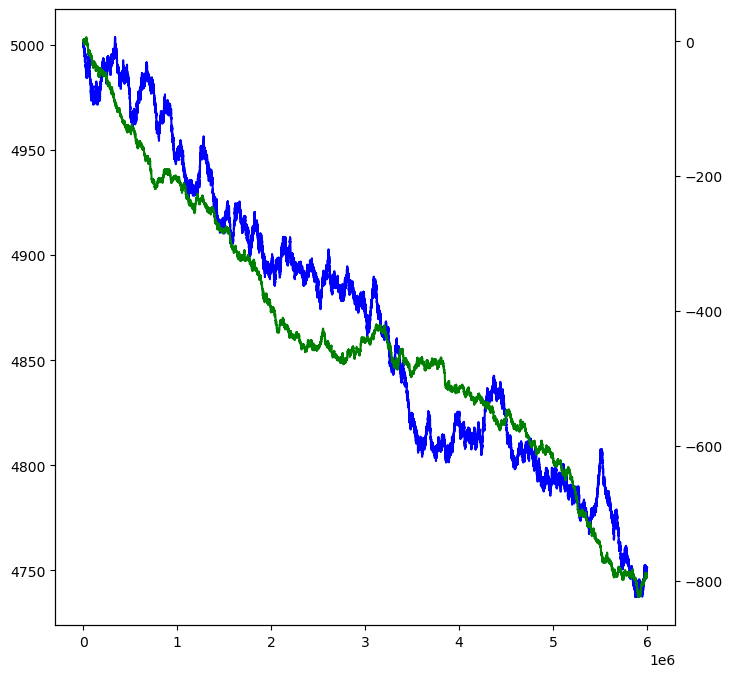

 0.0    2066
 5.0    1040
 6.0     924
 7.0     571
 1.0     253
 2.0     169
 4.0     124
 3.0      45
-1.0       3
-3.0       1
dtype: int64
-6.0       2771
-7.0       1242
 0.0        635
-5.0        582
-4.0        307
-1.0        216
-2.0        179
-3.0        136
 3.0          2
 4.0          2
-4989.0       1
dtype: int64


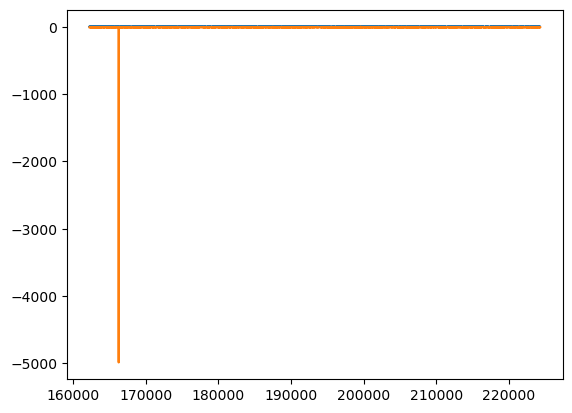

PEARLS


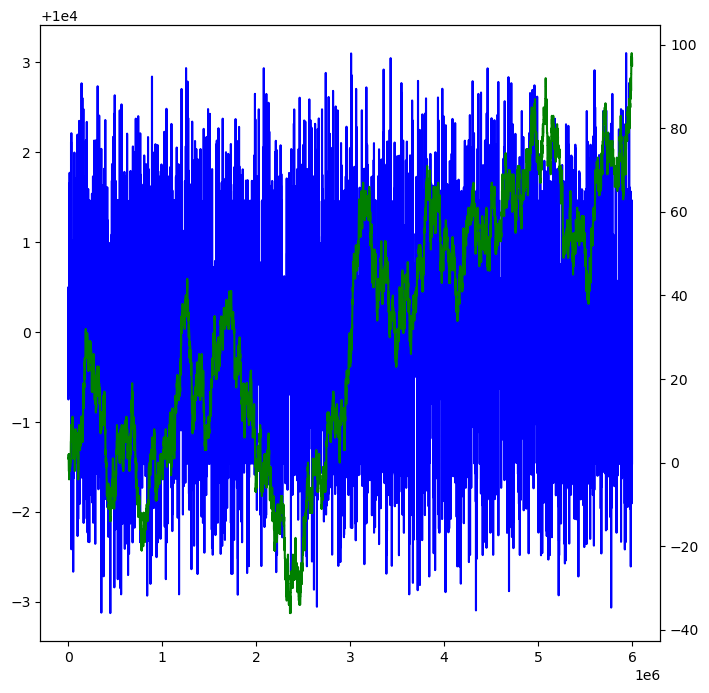

 0.0     1463
 6.0      794
 8.0      768
 10.0     366
 7.0      358
 2.0      267
 3.0      118
 4.0       77
 9.0       24
 5.0       14
-4.0        1
-2.0        1
dtype: int64
 0.0     1457
-6.0      817
-8.0      704
-7.0      444
-10.0     321
-2.0      238
-3.0      115
-4.0       62
-5.0       30
-9.0       12
 2.0        4
dtype: int64


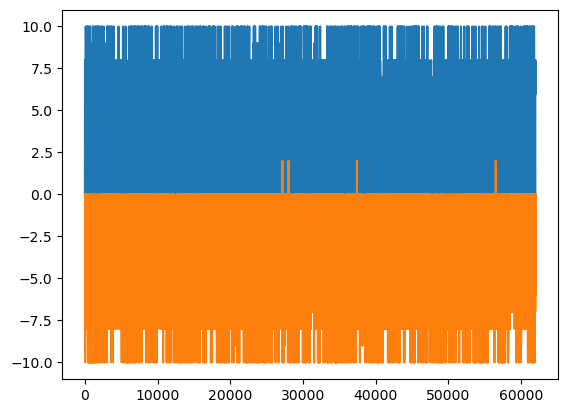

COCONUTS


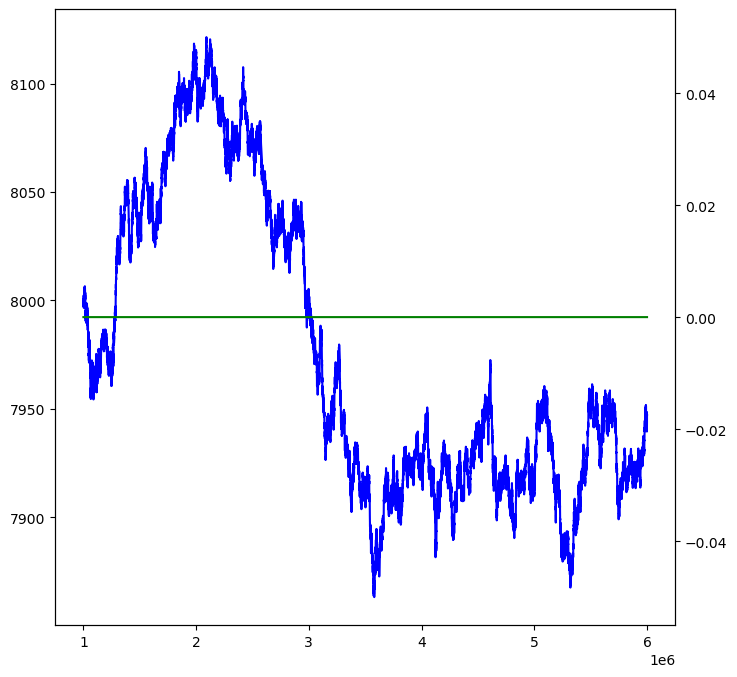

Series([], dtype: int64)
Series([], dtype: int64)


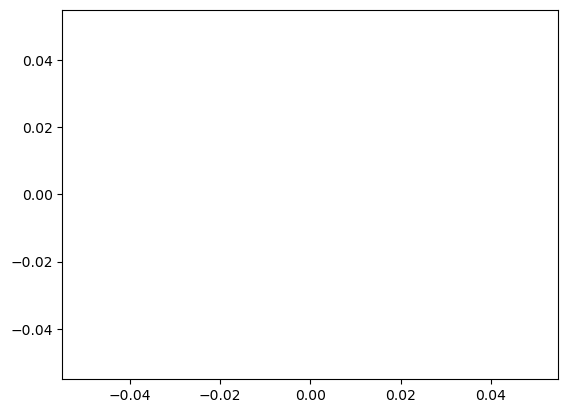

PINA_COLADAS


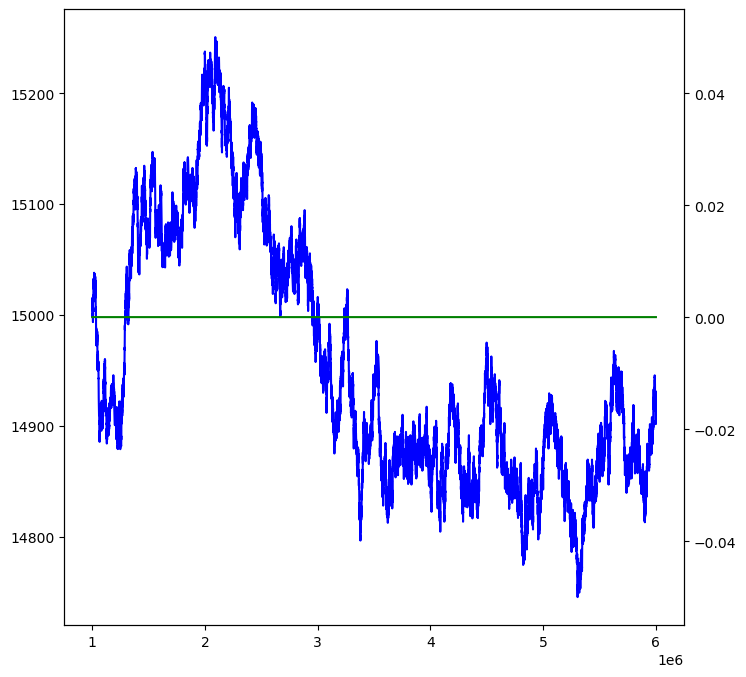

Series([], dtype: int64)
Series([], dtype: int64)


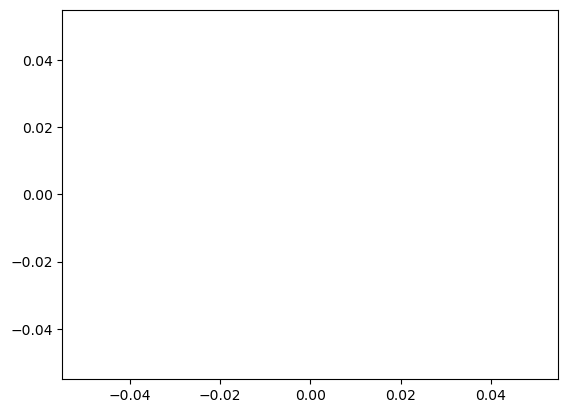

BERRIES


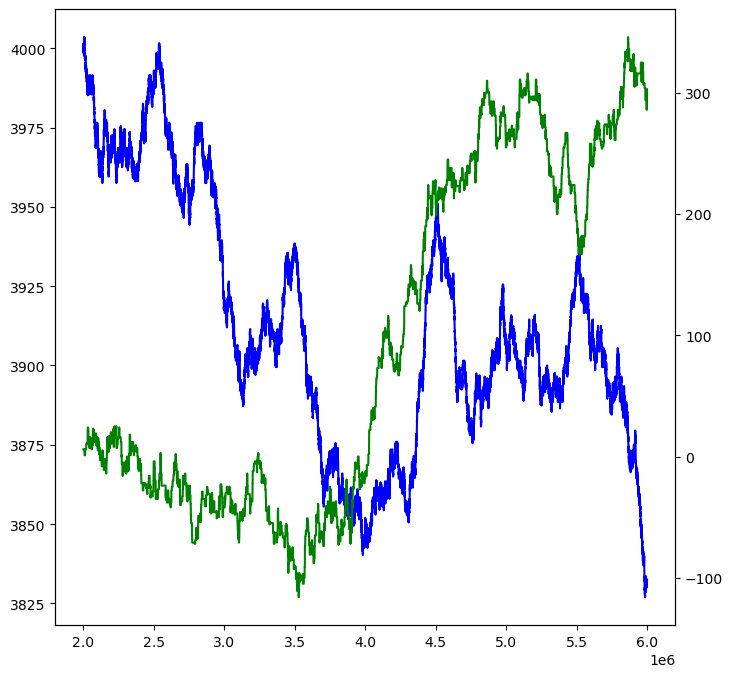

7.0    488
6.0     83
3.0     48
4.0     18
2.0      9
0.0      6
8.0      3
dtype: int64
-7.0    459
-6.0     58
-3.0     34
-4.0     15
-2.0     11
 0.0      3
-8.0      2
dtype: int64


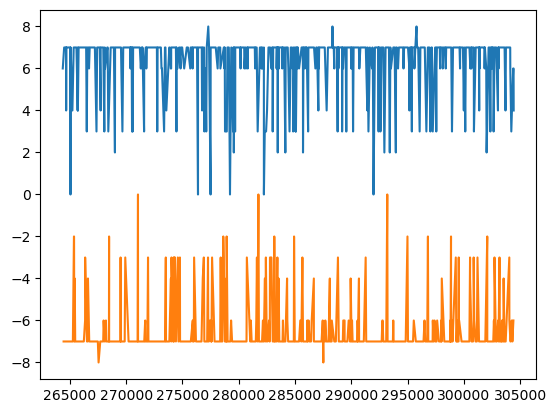

DIVING_GEAR


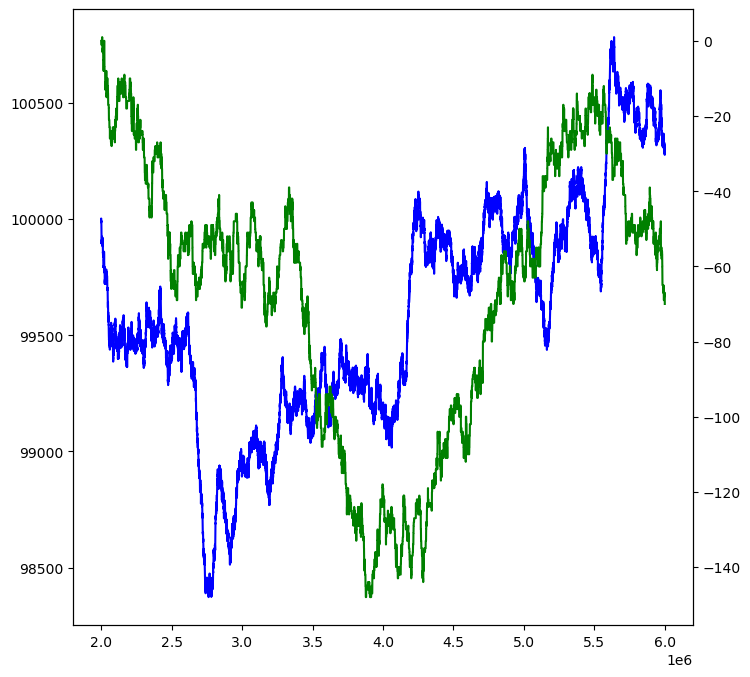

2.0    501
3.0    435
1.0     20
dtype: int64
-2.0    503
-3.0    487
-1.0     10
dtype: int64


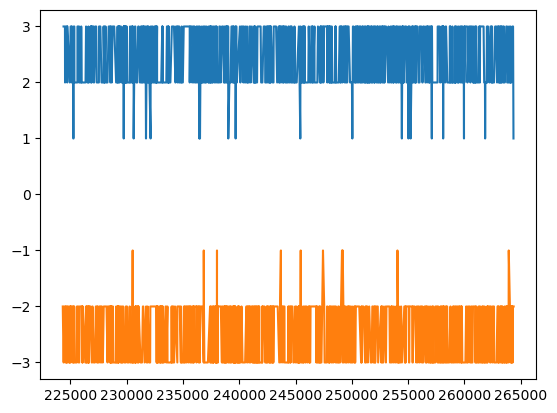

DIP


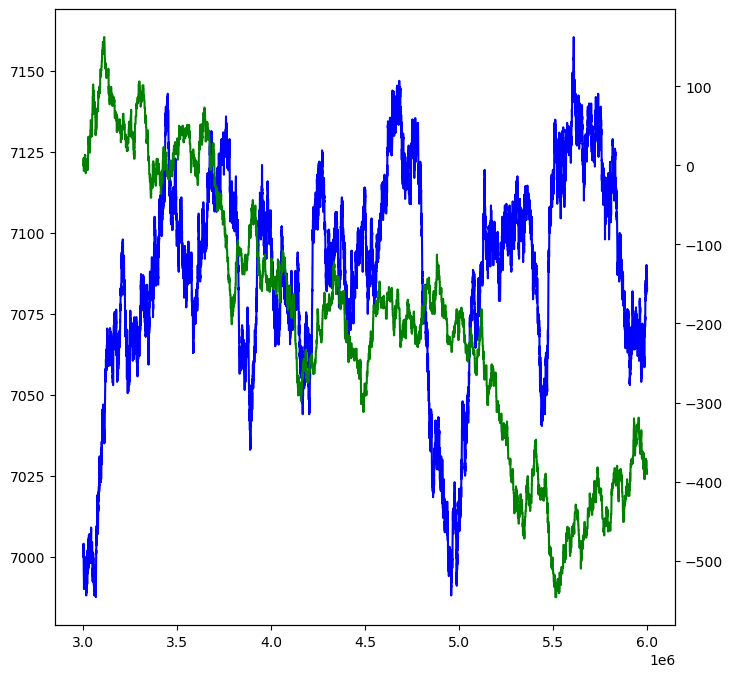

2.0    818
1.0    406
dtype: int64
-2.0    857
-1.0    397
dtype: int64


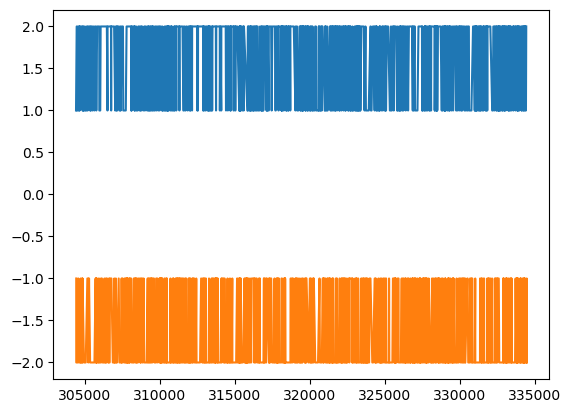

BAGUETTE


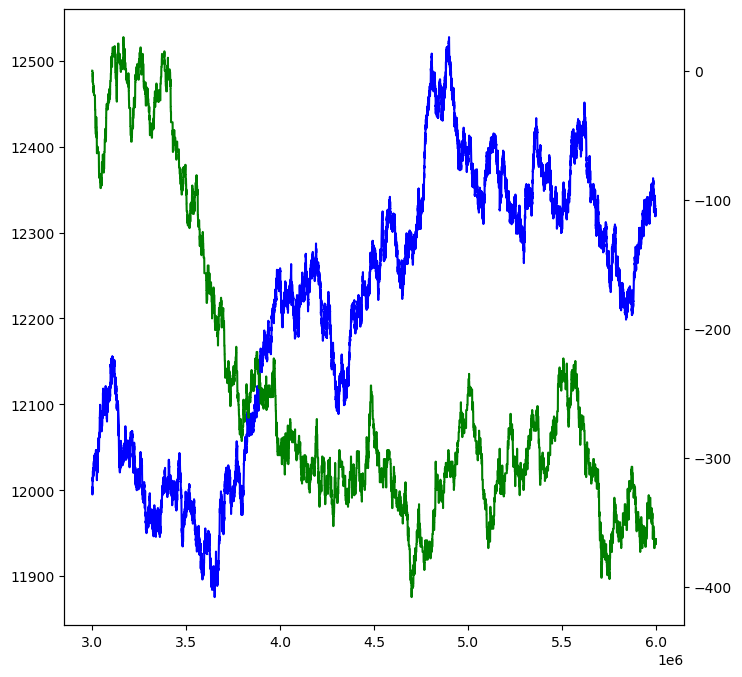

2.0    683
1.0    464
dtype: int64
-2.0    713
-1.0    480
dtype: int64


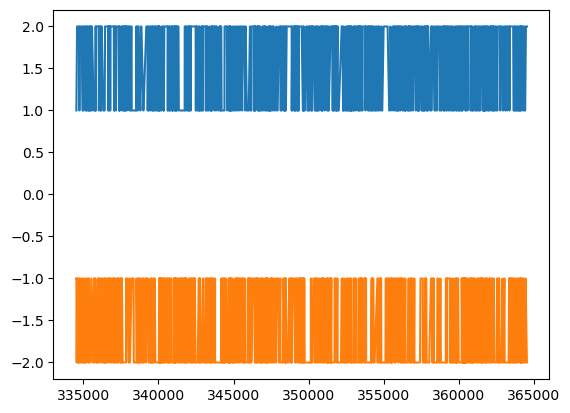

UKULELE


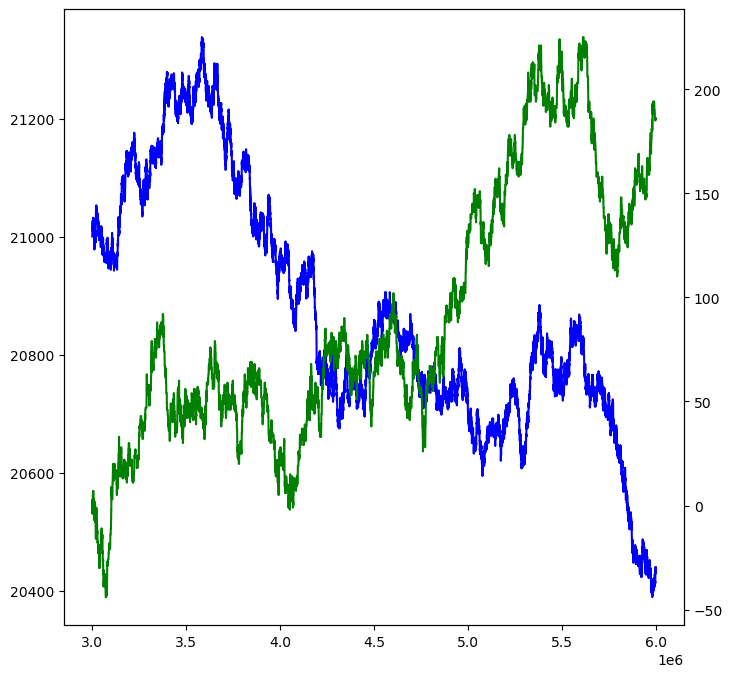

1.0    864
2.0    544
dtype: int64
-1.0    795
-2.0    531
dtype: int64


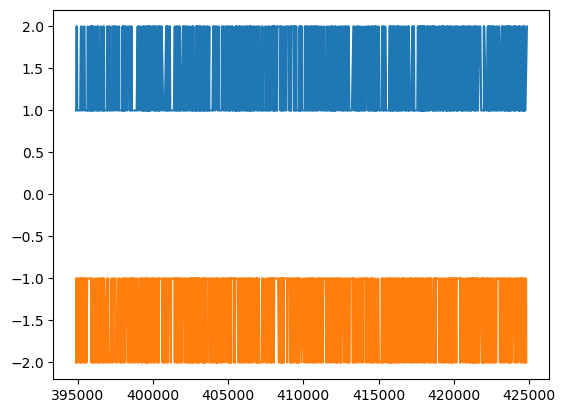

PICNIC_BASKET


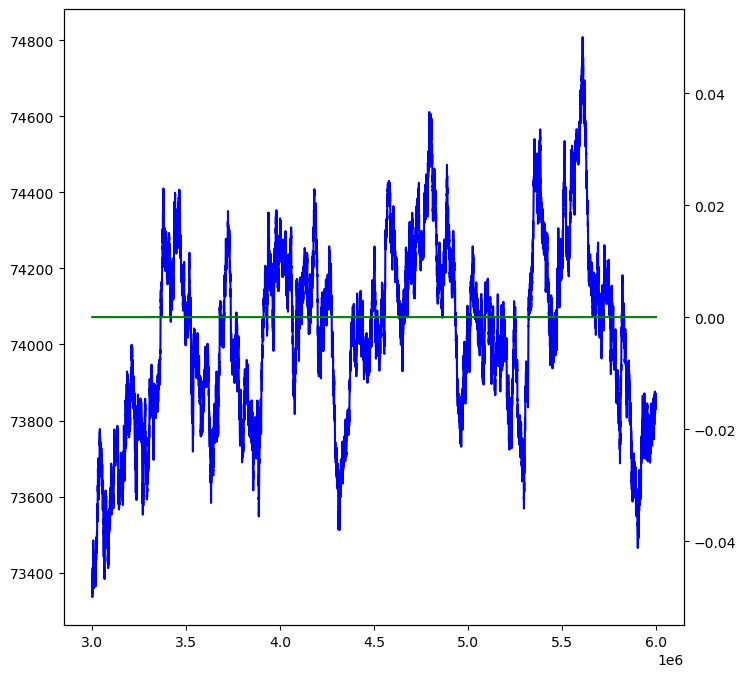

Series([], dtype: int64)
Series([], dtype: int64)


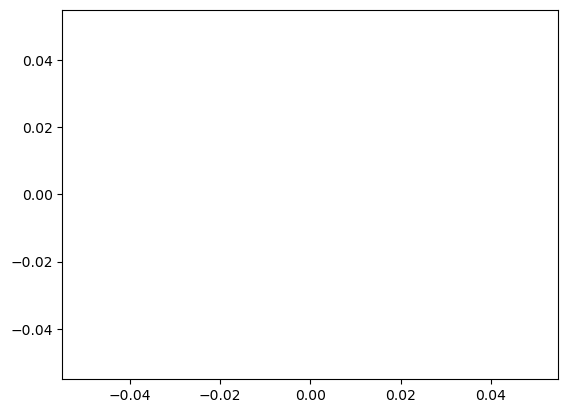

In [5]:
def plot_bid(df, monk):
    (df[df[monk] >= 1].price - df[df[monk] >= 1].bid_price_1).plot()
    print((df[df[monk] >= 1].price - df[df[monk] >= 1].bid_price_1).value_counts())
def plot_ask(df, monk):
    (df[df[monk] <= -1].price - df[df[monk] <= -1].ask_price_1).plot()
    print((df[df[monk] <= -1].price - df[df[monk] <= -1].ask_price_1).value_counts())
#for i in f_lst:
#    plot_bid(i, 'Caesar')
#    plot_ask(i, 'Caesar')
#    plt.show()

def plotting(df, name):
    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()
    t = final[final['product'] == name].timestamp
    ax1.plot(t, final[final['product'] == name].weighted_price, color = 'blue')
    ax2.plot(t, (df.Paris * df.quantity).cumsum(), color = 'green')
for i in range(len(f_lst)):
    print(items[i])
    plotting(f_lst[i], items[i])
    plt.show()
    plot_bid(f_lst[i], 'Paris')
    plot_ask(f_lst[i], 'Paris')
    plt.show()

In [6]:
final[(final['product'] == 'BANANAS')]

,day,timestamp,product,bid_vol,bid_price_1,weighted_price,ask_price_1,ask_vol,short,long,...,Charlie,Caesar,Camilla,Pablo,Penelope,Gary,Gina,Peter,Olivia,Olga
162264,-2,0,BANANAS,26.0,4997.0,5000.000000,5003.0,26.0,5000.000000,5000.000000,...,-1,0,0,0,0,0,0,0,0,0
162265,-2,100,BANANAS,20.0,4997.0,5000.357143,4998.0,21.0,5000.179017,5000.178720,...,0,0,0,0,0,0,0,0,0,0
162266,-2,200,BANANAS,31.0,4997.0,5000.500000,5004.0,31.0,5000.286545,5000.285992,...,0,0,0,0,0,0,0,0,0,0
162267,-2,300,BANANAS,27.0,4997.0,5000.500000,5004.0,27.0,5000.340309,5000.339628,...,0,0,0,0,0,0,0,0,0,0
162268,-2,400,BANANAS,20.0,4997.0,5000.189655,5002.0,29.0,5000.309877,5000.309533,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224318,3,5999600,BANANAS,30.0,4748.0,4751.277778,4749.0,36.0,4748.181077,4746.302766,...,1,0,0,0,0,-1,0,0,0,0
224319,3,5999600,BANANAS,30.0,4748.0,4751.277778,4749.0,36.0,4748.181077,4746.302766,...,0,0,0,0,0,0,0,0,0,0
224320,3,5999700,BANANAS,20.0,4748.0,4751.500000,4755.0,20.0,4748.197589,4746.311413,...,0,0,0,0,0,0,0,0,0,0
224321,3,5999800,BANANAS,23.0,4748.0,4751.420000,4753.0,25.0,4748.213620,4746.319913,...,1,0,0,0,0,0,0,0,0,0


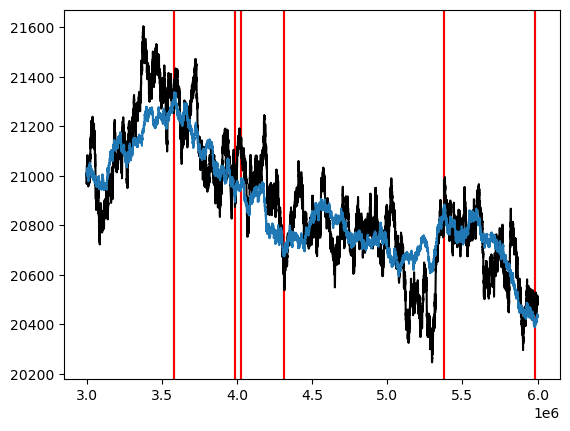

In [11]:
time = final[(final.timestamp > 000000) & (full.timestamp > 0000000)]
curr = time[(time['product'] == 'UKULELE')]
buy = time[(time['product'] == 'UKULELE') & (time.Olivia != 0)]
sell = time[(time['product'] == 'UKULELE') & (time.Olivia != 0)]
selling = list(sell.timestamp)
buying = list(buy.timestamp)
for i in buying:
    plt.axvline(i,color = 'green', markersize = 0.0000001)
for i in selling:
    plt.axvline(i,color = 'red', markersize = 0.0000001)
pair1 = time[(time['product'] == 'DIPS')]
pair2 = time[(time['product'] == 'BAGUETTE')]
pair3 = time[(time['product'] == 'UKULELE')]
# P = 4D + 2B + U + 360
# U = P - 4D - 2B - 360
plt.plot(picnic.timestamp, picnic.weighted_price - 4 * dips.weighted_price - 2 * baguette.weighted_price - 360, color = 'black')
plt.plot(picnic.timestamp, ukulele.weighted_price)

In [8]:
final[final.Olivia != 0]['product'].value_counts()

BANANAS    17
BERRIES    12
UKULELE     6
Name: product, dtype: int64